<a href="https://colab.research.google.com/github/HPashchenko/modelling_data_analyst/blob/main/M_5_creative_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/Data_analysis/yulu_rental.csv')
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1. Який відсоток від загальноі кількості користувачів належить незареєстрованим  клієнтам. Найкраще ці дані відобразить діаграма pie chart.

In [ ]:
df_users = df[['casual', 'registered']].sum()
df_users

casual         392135
registered    1693341
dtype: int64

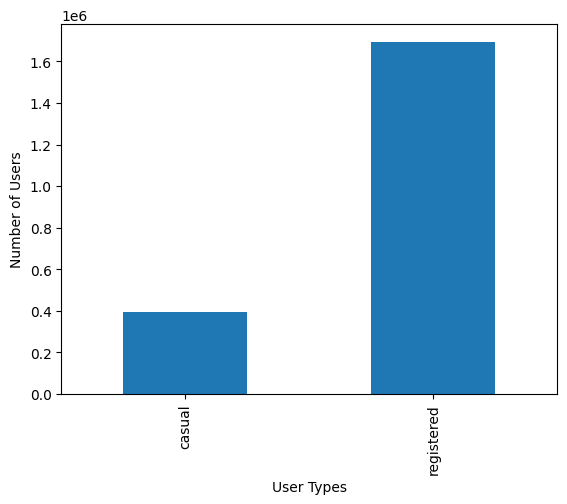

In [ ]:
df_users = df[['casual', 'registered']].sum()
df_users.plot(kind ='bar')
plt.xlabel('User Types')
plt.ylabel('Number of Users')
plt.show();

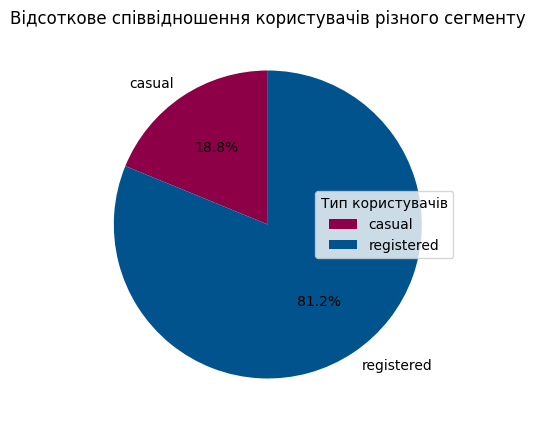

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
df_users.plot(kind='pie', startangle=90, autopct='%1.1f%%', colors=['#8d0047', '#00538d'])
ax.set_title('Відсоткове співвідношення користувачів різного сегменту')
ax.legend(title = 'Тип користувaчів', loc='right')
plt.show();


Лише 18,8 % від загальної кількості становлять незареєстровані користувачі.

2. Чи впливають пори року та погодні умови на кількість неформальних користувачів?

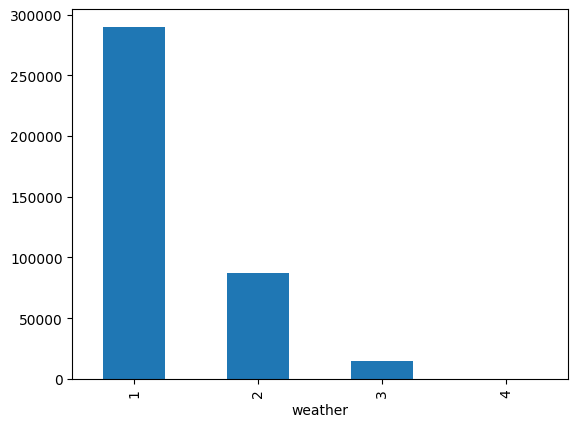

In [ ]:
df.groupby('weather')['casual'].sum().plot.bar();

Так, однозначно, найбільшу кількість ми спостерігаємо в весняно - літній період

3. Яка залежність користування сервісом у осінньо-зимовий період?
 Візуалізація графіка розсіювання між змінними casual та registered за допомогою методу seaborn.jointplot

In [ ]:
df_filt = df[df.season.isin([3,4])]

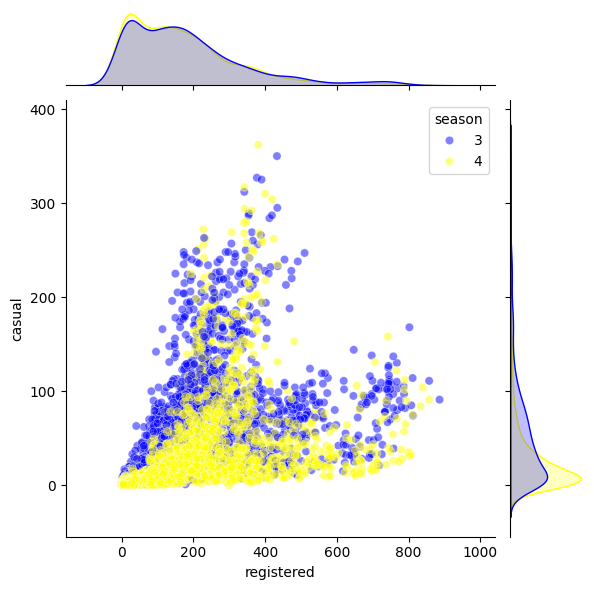

In [ ]:
sns.jointplot(data=df_filt, x="registered", y="casual", hue='season', alpha=0.5, palette=["blue", "yellow"]);

Спостереження по графіку
1. Залежність між зареєстрованими і не зареєстрованими клієнтами. Помітну активність ми спостерігаємо в осінній період. Помітний спад  -  в зимовий.
Також помітно дві гілки розсіювання на графіку, якісь обставини спонукають користуватися сервісом без реєстрації.

Які взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат, в залежності від сезону?

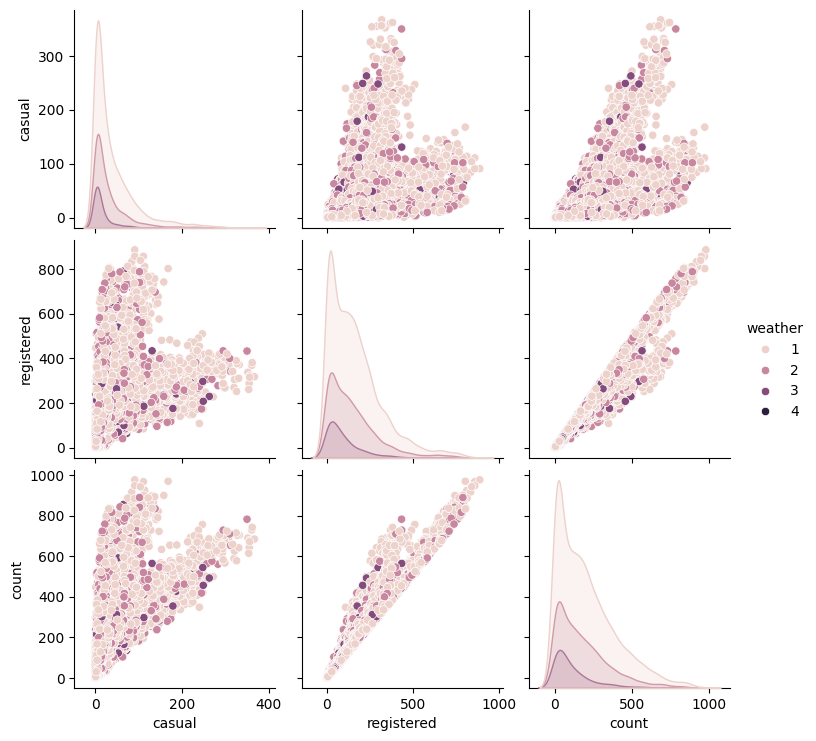

In [ ]:
df_filter_2 = df[['casual', 'registered', 'count', 'weather']]

sns.pairplot(data=df_filter_2, hue='weather');

Ще один доказ того, що найбільші показники користувачів в весняно -літній період.